In [390]:
import numpy as np
from scipy.stats import norm
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [391]:
seed(47)

In [392]:
x = norm.rvs(size=5)
x

array([-0.84800948,  1.30590636,  0.92420797,  0.6404118 , -1.05473698])

In [393]:
np.mean(x), np.std(x)

(0.19355593334131074, 0.9606195639478641)

In [394]:
np.sqrt(np.sum((x-np.mean(x))**2)/5)  # sample std

0.9606195639478641

In [395]:
np.sqrt(np.sum((x-np.mean(x))**2)/4)  # population std or unbiased estimator of pop parameter 

1.0740053227518152

### Mean = var/sqrt(n)

\begin{equation}
\mu = \frac{\sigma}{\sqrt n}
\end{equation}

In [396]:
population_height = norm.rvs(172, 5, size=5000)
x = population_height 

In [397]:
np.mean(x), np.std(x)

(171.99021147496384, 4.99384247418737)

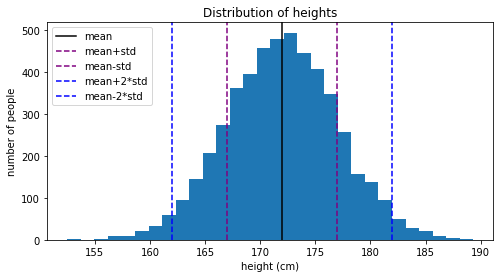

In [398]:
_ = plt.figure(figsize=(8,4))
_= plt.hist(x, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights')
_ = plt.axvline(172, color='k', linestyle='-', label='mean')
_ = plt.axvline(172+5, color='purple', linestyle='--', label='mean+std')
_ = plt.axvline(172-5, color='purple', linestyle='--', label='mean-std')
_ = plt.axvline(172+10, color='blue', linestyle='--', label='mean+2*std')
_ = plt.axvline(172-10, color='blue', linestyle='--', label='mean-2*std')
_ = plt.legend()

In [399]:
seed(100)
def townfolk_sampler(x, n):
    return np.random.choice(x, n)

In [400]:
n1 = 20
x1 = townfolk_sampler(x, n1)
x1[0:10] 

array([171.8524983 , 171.28591443, 174.05636138, 178.90443052,
       167.02391248, 170.82557018, 175.8675061 , 171.6188069 ,
       170.13210923, 180.10076067])

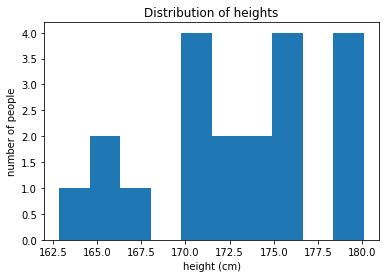

In [401]:
_ = plt.hist(x1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights')
_ = plt.show()

In [402]:
np.std(x1)

4.900502367334214

# Central Limit Theorem (CLT)

In [403]:
year_sample = []
for i in range(365):
    year_sample.append(np.mean(townfolk_sampler(x, n1)))

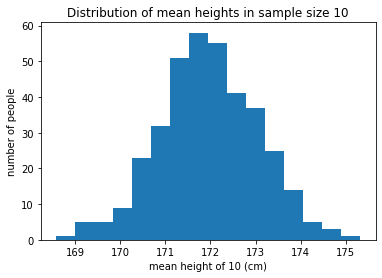

In [404]:
_ = plt.hist(year_sample, bins=16)
_ = plt.xlabel('mean height of 10 (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of mean heights in sample size 10')

In [405]:
np.std(year_sample)

1.0960095604717672

In [406]:
np.std(year_sample)*np.sqrt(n1)

4.901503762409076

# 95% Confidence Interval 

In [407]:
sM = 172
sstd = 1.6

tpop = norm.rvs(loc=sM, scale=sstd, size=5000)
np.mean(tpop), np.std(tpop)

(171.984410819237, 1.604502362679889)

In [408]:
tpop_1 = np.sort(tpop)

In [409]:
tpop_1pdf = norm.pdf(tpop_1, loc=sM, scale=sstd)

In [410]:
conf_int_95 = np.percentile(tpop_1, [2.5,97.5])
conf_int_95, conf_int_95[0], conf_int_95[1]

(array([168.89875558, 175.11705034]), 168.8987555805624, 175.11705033968465)

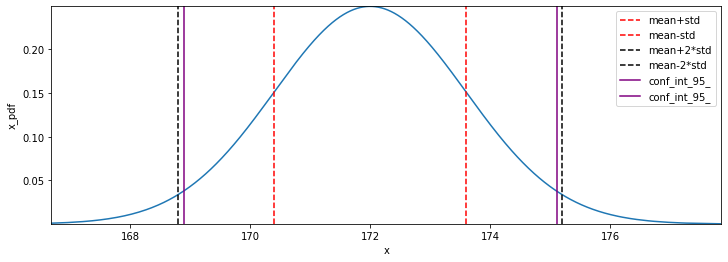

In [411]:
_ = plt.figure(figsize=(12,4))
_ = plt.plot(tpop_1, tpop_1pdf)
_ = plt.xlabel('x')
_ = plt.ylabel('x_pdf')
_ = plt.autoscale(enable=True, tight=True)
_ = plt.axvline(sM+sstd, color='red', linestyle='--', label='mean+std')
_ = plt.axvline(sM-sstd, color='red', linestyle='--', label='mean-std')

_ = plt.axvline(sM+2*sstd, color='black', linestyle='--', label='mean+2*std')
_ = plt.axvline(sM-2*sstd, color='black', linestyle='--', label='mean-2*std')

_ = plt.axvline(conf_int_95[0], color='purple', linestyle='-', label='conf_int_95_')
_ = plt.axvline(conf_int_95[1], color='purple', linestyle='-', label='conf_int_95_')

_ = plt.legend()
_ = plt.show()